<a href="https://colab.research.google.com/github/mftnakrsu/case_study_baimageing/blob/main/yolov8_b_atlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
!pip install ultralytics torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 22.2 MB/s eta 0:00:00


In [ ]:
#unzip

In [5]:
import zipfile
import os

# Zip dosyasının adını belirtin
zip_file_name = '/content/model_dataset.zip'

# Zip dosyasını açma
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('model_dataset')  # Çıkarılan dosyaların kaydedileceği dizin

# Çıkarılan dosyaların içeriğini listeleme
extracted_files = os.listdir('model_dataset')
print("Çıkarılan dosyalar:")
for file in extracted_files:
    print(file)


Çıkarılan dosyalar:
additional_class
single_class_model.pt


In [6]:
model_path = "/content/model_dataset/single_class_model.pt"

In [8]:
from ultralytics import YOLO

# Mevcut modeli yükle
model = YOLO(model_path)

# Sınıf isimlerini kontrol et
print("Sınıf İsimleri:", model.names)


Sınıf İsimleri: {0: 'small-vehicle'}


In [9]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
    

In [22]:
image_folder = "/content/model_dataset/additional_class/images/val"

In [25]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

# Görüntülerin bulunduğu klasörün yolu
image_folder = image_folder  # Burayı kendi klasör yolunuzla değiştirin
output_folder = '/content/prediction_output_val'  # Tahmin sonuçlarını kaydetmek için bir klasör oluşturun

# Çıkış klasörünü oluştur
os.makedirs(output_folder, exist_ok=True)


In [28]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# Modeli yükle
model = YOLO('/content/model_dataset/single_class_model.pt')  # Model dosyanızı belirtin

# Görüntü klasörünü tanımlayın
image_folder = '/content/model_dataset/additional_class/images/val'  # Görüntülerin bulunduğu klasör
output_folder = '/content/predicted_images'  # Çıktıların kaydedileceği klasör
os.makedirs(output_folder, exist_ok=True)

# Klasördeki tüm görüntü dosyalarını alın
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

# Görüntüler üzerinde tahmin çalıştır
for image_path in image_files:
    # Tahmin yap
    results = model(image_path)  # Tahmin sonucu bir liste döner

    # Orijinal görüntüyü yükle
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV görüntüsünü RGB'ye çevir

    # Tahmin edilen bounding box'ları çiz
    for box in results[0].boxes.data:  # İlk tahmin sonucundan bounding box'lar alınıyor
        x1, y1, x2, y2, conf, cls = box[:6]  # Bounding box koordinatları ve sınıf bilgisi
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Koordinatları tamsayıya çevir

        # Bounding box çizimi (kalınlığı azaltılmış)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)  # Green bbox, kalınlık=2

    # Çıktıyı kaydet
    output_path = os.path.join(output_folder, f"{os.path.basename(image_path)}")
    plt.imshow(img)
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    print(f"Tahmin tamamlandı ve kaydedildi: {output_path}")



image 1/1 /content/model_dataset/additional_class/images/val/1_316583_204033.jpg: 1024x1024 34 small-vehicles, 149.4ms
Speed: 4.3ms preprocess, 149.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)
Tahmin tamamlandı ve kaydedildi: /content/predicted_images/1_316583_204033.jpg

image 1/1 /content/model_dataset/additional_class/images/val/1_316554_204045.jpg: 1024x1024 88 small-vehicles, 126.2ms
Speed: 4.6ms preprocess, 126.2ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)
Tahmin tamamlandı ve kaydedildi: /content/predicted_images/1_316554_204045.jpg

image 1/1 /content/model_dataset/additional_class/images/val/1_316560_204036.jpg: 1024x1024 194 small-vehicles, 125.7ms
Speed: 4.8ms preprocess, 125.7ms inference, 8.3ms postprocess per image at shape (1, 3, 1024, 1024)
Tahmin tamamlandı ve kaydedildi: /content/predicted_images/1_316560_204036.jpg

image 1/1 /content/model_dataset/additional_class/images/val/1_316564_204045.jpg: 1024x1024 73 small-

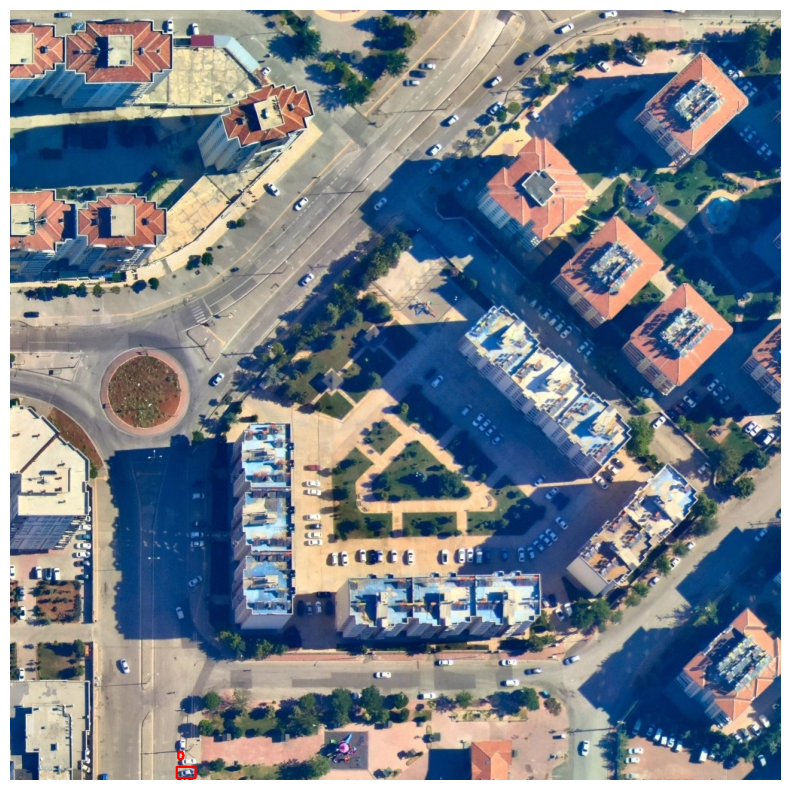

In [47]:
import cv2
import matplotlib.pyplot as plt
import os

def draw_bounding_boxes(image_path, label_path):
    # Resmi yükle
    if not os.path.exists(image_path):
        print(f"Resim yüklenemedi: {image_path}")
        return

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV'den RGB'ye dönüştür

    # Etiket dosyasını oku
    if not os.path.exists(label_path):
        print(f"Etiket dosyası bulunamadı: {label_path}")
        return

    with open(label_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        # Sınıf ve bounding box koordinatlarını al
        class_id, x_center, y_center, width, height = map(float, line.split())

        # Koordinatları piksel cinsine dönüştür
        img_height, img_width, _ = image.shape
        x_center = int(x_center * img_width)
        y_center = int(y_center * img_height)
        width = int(width * img_width)
        height = int(height * img_height)

        # Bounding box'ın köşe noktalarını hesapla
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Bounding box'ı çiz
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Kırmızı renk, 2 piksel kalınlık

        # Sınıf yazısını ekle
        cv2.putText(image, str(int(class_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Görüntüyü göster
    plt.figure(figsize=(20, 10))  # Resim boyutunu ayarlayın (genişlik, yükseklik)
    plt.imshow(image)
    plt.axis('off')  # Eksenleri gizle
    plt.show()


# Örnek kullanım
image_path = "/content/1_316535_204041.jpg"  # Görüntü dosyasının yolu
label_path = "/content/1_316535_204041.txt"  # Etiket dosyasının yolu

draw_bounding_boxes(image_path, label_path)
